# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Load data
credit_df = pd.read_excel('German_Credit.xlsx')

# read_excel is used to read xlsx files

In [4]:
#Print header of the file
credit_df.head()

Creditability  CreditAmount  DurationOfCreditInMonths
0              1          1049                        18
1              1          2799                         9
2              1           841                        12
3              1          2122                        12
4              1          2171                        12

# 2. Check how many records do we have


In [5]:
credit_df.shape
# gives number of rows and columns

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

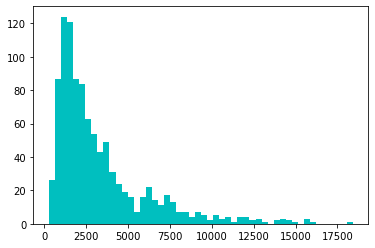

In [6]:
plt.hist(credit_df['CreditAmount'], bins= 50, color='C') # used to plot histogram with 50 bins
plt.show()

# 4. Convert 'CreditAmount' into a categorical feature by grouping with start and end of interval as:
-  (0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000)

In [7]:
credit_df['CreditAmount']

0       1049
1       2799
2        841
3       2122
4       2171
       ...  
995     1987
996     2303
997    12680
998     6468
999     6350
Name: CreditAmount, Length: 1000, dtype: int64

In [8]:
# Binning

bin_edges = [0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000]         # edges to define intervals
bin_labels = ['0-500', '501-1000', '1001-1500','1501-2000', '2001-2500', '2501-5000',
              '5001-7500','7501-10000', '10001-15000', '15001-20000']               # labels to denote each interval
credit_df['CreditAmount'] = pd.cut(credit_df['CreditAmount'], bins=bin_edges , labels=bin_labels)
# pd.cut is used to divide the continous column in different groups as per bin egges and named according to bin label.

In [9]:
credit_df['CreditAmount']

0        1001-1500
1        2501-5000
2         501-1000
3        2001-2500
4        2001-2500
          ...     
995      1501-2000
996      2001-2500
997    10001-15000
998      5001-7500
999      5001-7500
Name: CreditAmount, Length: 1000, dtype: category
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

# 5. Create histogram to represent count of different 'Creditability' under each group of 'CreditAmount'

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'CreditAmount',data=credit_df,hue='Creditability')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

# 6. Find out total number Creditability in each interval of CreditAmount

In [11]:
credit_df.groupby('CreditAmount')['Creditability'].count()

## Maximum values are in the interval 2501-5000

CreditAmount
0-500           18
501-1000        98
1001-1500      190
1501-2000      126
2001-2500      105
2501-5000      275
5001-7500      102
7501-10000      46
10001-15000     35
15001-20000      5
Name: Creditability, dtype: int64

# 7. Find out total number of Creditability where Creditability is '0' and Creditability is '1' in each interval of CreditAmount

In [12]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'])
#it shows the frequencies between the categories of two different features

Creditability   0    1
CreditAmount          
0-500           3   15
501-1000       34   64
1001-1500      51  139
1501-2000      33   93
2001-2500      26   79
2501-5000      75  200
5001-7500      34   68
7501-10000     20   26
10001-15000    21   14
15001-20000     3    2

In [13]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'],normalize='columns')
# it shows % distribution of each class in different interval of CreditAmount

Creditability    0    1
CreditAmount           
0-500         0.01 0.02
501-1000      0.11 0.09
1001-1500     0.17 0.20
1501-2000     0.11 0.13
2001-2500     0.09 0.11
2501-5000     0.25 0.29
5001-7500     0.11 0.10
7501-10000    0.07 0.04
10001-15000   0.07 0.02
15001-20000   0.01 0.00

# 6. Prepare input data for the model

In [14]:
credit_df['CreditAmount'].unique()
# Displays all the unique value in the column

## Because of binning the categories are set in increasing order

[1001-1500, 2501-5000, 501-1000, 2001-2500, 5001-7500, 1501-2000, 7501-10000, 0-500, 10001-15000, 15001-20000]
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

In [15]:
credit_df['CreditAmount'] = credit_df['CreditAmount'].cat.codes

# Converting categorical values inot numbers w.r.t their order, 0-500 is '0' and 15001-20000 is '9'

In [16]:
credit_df['CreditAmount'].unique()

array([2, 5, 1, 4, 6, 3, 7, 0, 8, 9], dtype=int8)

In [17]:
#separating dependent and independent variables
X = credit_df.drop("Creditability",axis=1)
Y = credit_df.Creditability.astype('category')

# 7. Fit logistic regression model

In [18]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.580418
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.046     
Dependent Variable:    Creditability      AIC:                818.5847  
Date:                  2020-05-29 00:29   BIC:                832.2379  
No. Observations:      700                Log-Likelihood:     -406.29   
Df Model:              2                  LL-Null:            -425.90   
Df Residuals:          697                LLR p-value:        3.0612e-09
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     1.5089   0.2006  7.5200 0.0000  1.1156  1.9022
CreditAmount              0.1312   0.0572  2.2917 0.0219  0.0190  0.2434
DurationOfCreditInMonths -0.0525   0.0091 -5.7444 0.0000 -0.0705 -0.0346
========================================================================

"""

# 8. Test accuracy calculation

In [19]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df[0:5]

actual  predicted_prob  predicted
521      0            0.66          1
737      1            0.70          1
740      1            0.78          1
660      1            0.79          1
411      1            0.71          1

# 9. Build a confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [22]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [23]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.67


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

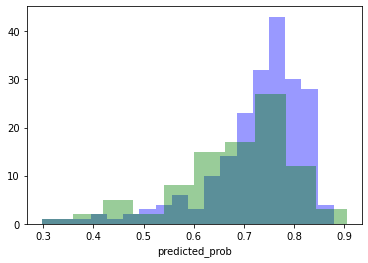

In [24]:
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'g' )
plt.show()